In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
#load the data
data=pd.read_csv('Social_Network_Ads.csv')

#view rows
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [161]:
data.shape

(400, 5)

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [163]:
data.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [164]:
for col in data.columns:
    unique_val = data[col].nunique()
    print(f"Number of unique values in {col}: {unique_val}")

Number of unique values in User ID: 400
Number of unique values in Gender: 2
Number of unique values in Age: 43
Number of unique values in EstimatedSalary: 117
Number of unique values in Purchased: 2


In [165]:
# drop user id since its a unique id of every user and doesnt contribute to our model
data.drop('User ID', inplace=True, axis=1)

In [166]:
#initial exploration of null values
data.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [167]:
data[data.duplicated()]

,Gender,Age,EstimatedSalary,Purchased
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [168]:
data.drop_duplicates(inplace=True)

In [169]:
data.shape

(380, 4)

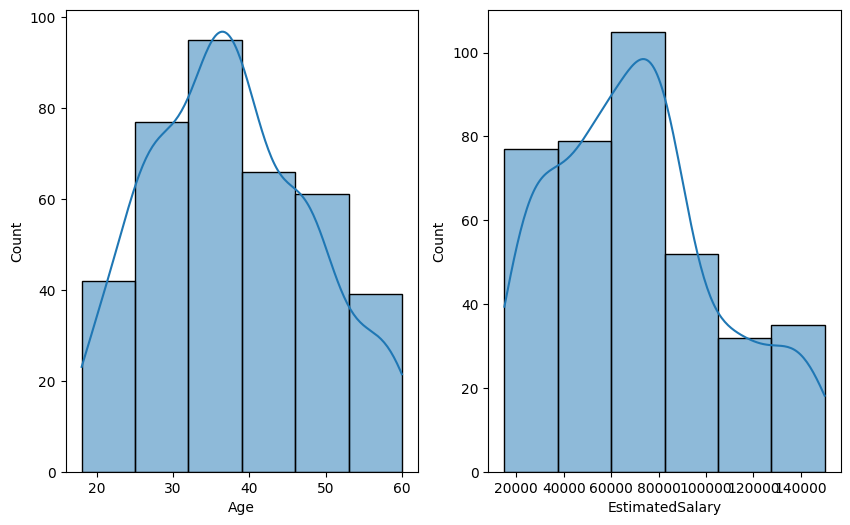

In [170]:
#uni-variate analysis
num_cols = ['Age', 'EstimatedSalary']

fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes = axes.flatten()
for ind, col in enumerate(num_cols):
    sns.histplot(data, x=col, ax=axes[ind], kde=True, bins=6)


Text(0.5, 1.0, 'bins=6')

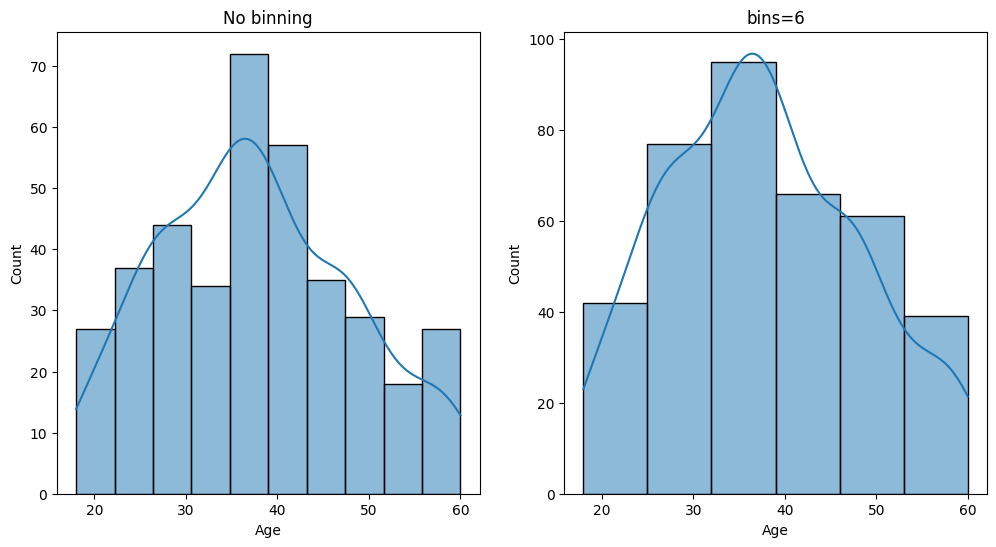

In [171]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(data, x=data['Age'], kde=True)
plt.title("No binning")

plt.subplot(1,2,2)
sns.histplot(data, x=data['Age'], kde=True, bins=6)
plt.title("bins=6")

In [172]:
import numpy as np
bin_edges = np.histogram_bin_edges(data["Age"], bins="fd")
len(np.round(bin_edges).astype(int))

10

<Axes: xlabel='Gender', ylabel='count'>

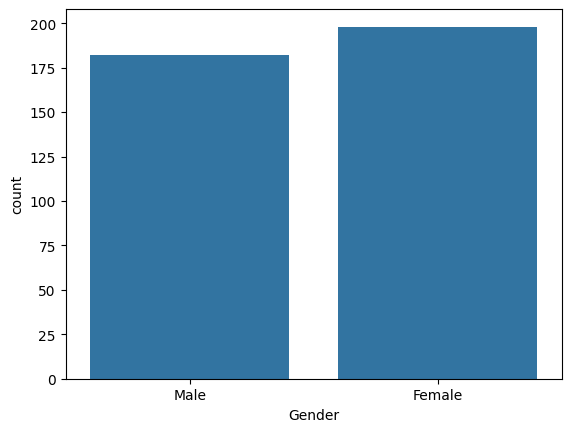

In [173]:
sns.countplot(data, x='Gender')

<Axes: xlabel='Gender', ylabel='percent'>

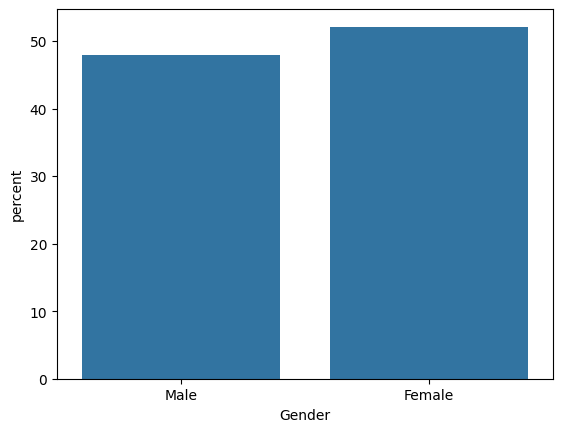

In [174]:
sns.countplot(data, x='Gender', stat='percent')

<Axes: xlabel='Purchased', ylabel='count'>

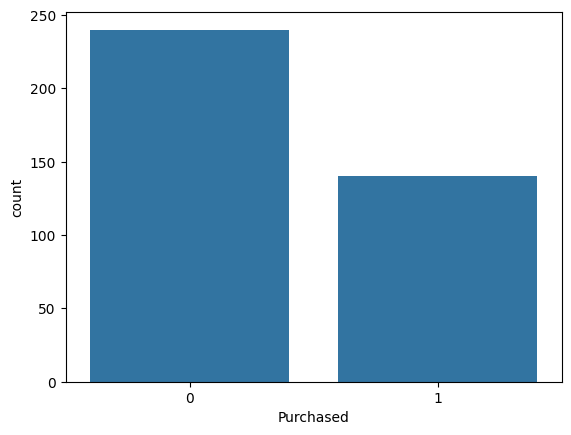

In [175]:
sns.countplot(data, x='Purchased')

<Axes: xlabel='Purchased', ylabel='percent'>

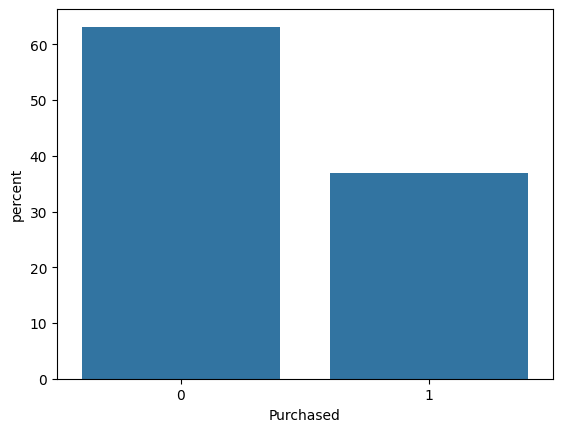

In [176]:
sns.countplot(data, x='Purchased', stat='percent')

In [177]:
# imbalanced target class

<Axes: >

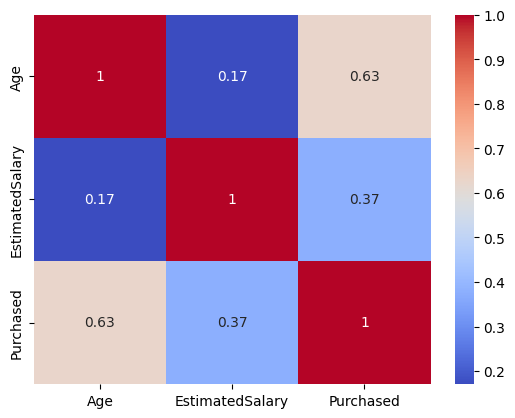

In [178]:
#bivariate analysis
corr_matrix = data[num_cols+['Purchased']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


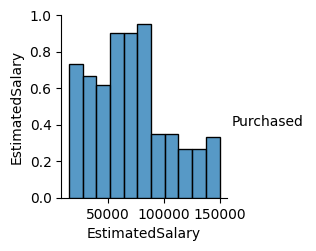

In [206]:
g = sns.PairGrid(data[num_cols+['Purchased']], hue='Purchased', diag_sharey=False, palette='Greens')
g.map_diag(sns.histplot, hue=None)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
g.add_legend()

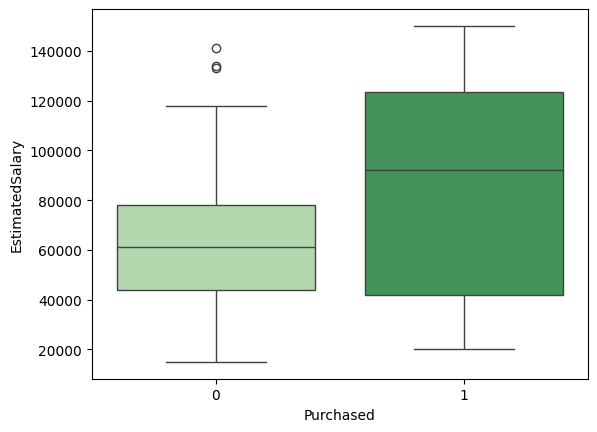

In [207]:
for col in num_cols:
    plt.figure()
    sns.boxplot(data, x='Purchased', y=col, hue='Purchased', legend=False, palette='Greens')

In [181]:
#feature engineering
#bin the ages
# bins=[18, 25, 40, 60]
# labels=['young adult', 'adult', 'middle aged']
data['Age'] = pd.cut(data['Age'], bins=len(np.round(bin_edges).astype(int)))
data['Age'] 

0      (17.958, 22.2]
1        (34.8, 39.0]
2        (22.2, 26.4]
3        (26.4, 30.6]
4      (17.958, 22.2]
            ...      
395      (43.2, 47.4]
396      (47.4, 51.6]
397      (47.4, 51.6]
398      (34.8, 39.0]
399      (47.4, 51.6]
Name: Age, Length: 380, dtype: category
Categories (10, interval[float64, right]): [(17.958, 22.2] < (22.2, 26.4] < (26.4, 30.6] < (30.6, 34.8] ... (43.2, 47.4] < (47.4, 51.6] < (51.6, 55.8] < (55.8, 60.0]]

In [182]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,"(17.958, 22.2]",19000,0
1,Male,"(34.8, 39.0]",20000,0
2,Female,"(22.2, 26.4]",43000,0
3,Female,"(26.4, 30.6]",57000,0
4,Male,"(17.958, 22.2]",76000,0


In [183]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

cat_cols=['Gender','Age']
cat_pipe = make_pipeline(OneHotEncoder())

num_cols=['EstimatedSalary']
num_pipe=make_pipeline(StandardScaler())

preprocess = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
])

In [184]:
from sklearn.model_selection import train_test_split
X=data[cat_cols+num_cols]
y=data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [185]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

log_model = make_pipeline(preprocess, LogisticRegression(class_weight='balanced'))
log_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Age']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EstimatedSalary'])])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [186]:
# predictions for in-sample and out of sample
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

In [187]:
from sklearn import metrics
print("Classification report for training data - in-sample")
print(metrics.classification_report(y_train, y_pred_train))

Classification report for training data - in-sample
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       168
           1       0.87      0.91      0.89        98

    accuracy                           0.92       266
   macro avg       0.91      0.92      0.91       266
weighted avg       0.92      0.92      0.92       266



In [188]:
from sklearn import metrics
print("Classification report for testing data - in-sample")
print(metrics.classification_report(y_test, y_pred_test))

Classification report for testing data - in-sample
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        72
           1       0.79      0.88      0.83        42

    accuracy                           0.87       114
   macro avg       0.86      0.87      0.86       114
weighted avg       0.87      0.87      0.87       114



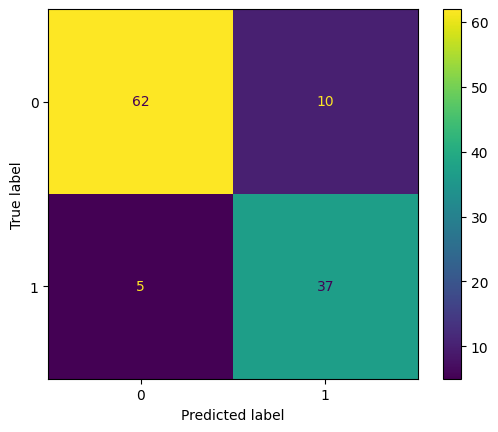

In [189]:
cm = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [190]:
metrics.roc_auc_score(y_test, y_pred_test)

0.8710317460317462

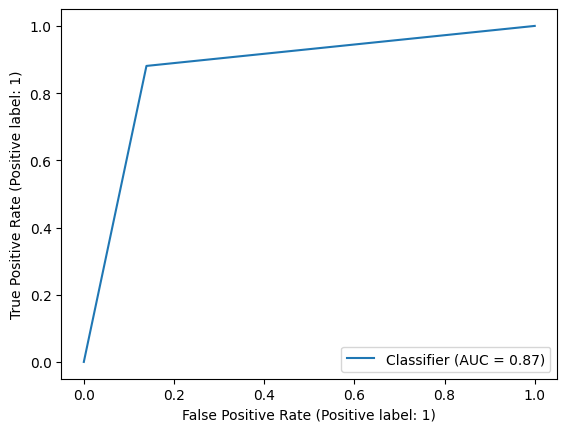

In [191]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred_test)

In [192]:
from sklearn.ensemble import RandomForestClassifier

rf_model = make_pipeline(preprocess, RandomForestClassifier(class_weight='balanced'))
rf_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Age']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EstimatedSalary'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [193]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [194]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.99      0.99      0.99        98

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266



In [195]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.76      0.90      0.83        42

    accuracy                           0.86       114
   macro avg       0.85      0.87      0.85       114
weighted avg       0.87      0.86      0.86       114



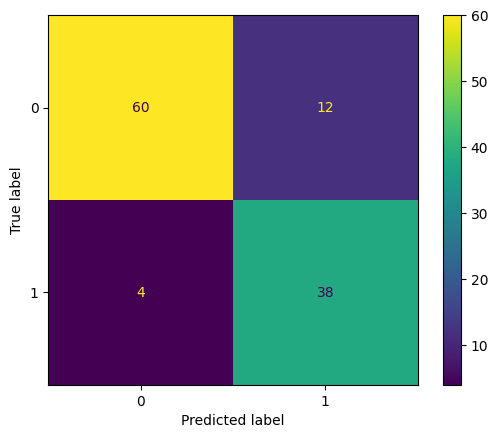

In [196]:
cm = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [197]:
metrics.roc_auc_score(y_test, y_pred_test)

0.869047619047619

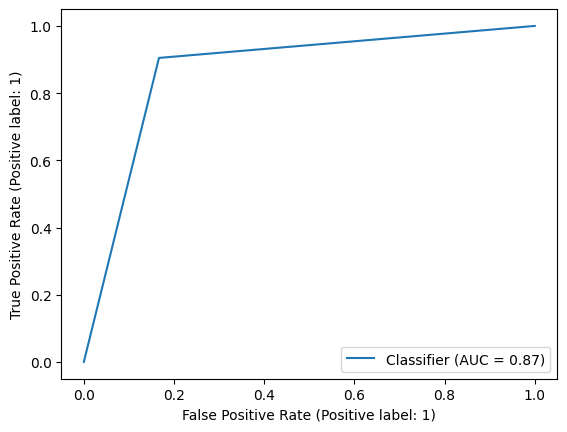

In [198]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred_test)

In [199]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_model, X, y, cv=10, scoring='roc_auc')
print(f"CV scores for Logistic Regression model AUC: {cv_scores.mean()}")

cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='roc_auc')
print(f"CV scores for Random Forest model AUC: {cv_scores.mean()}")

CV scores for Logistic Regression model AUC: 0.9361607142857142
CV scores for Random Forest model AUC: 0.9200892857142857


In [200]:
from sklearn.model_selection import GridSearchCV
params = {
    'randomforestclassifier__max_depth':[6, 8, 10, 12, 20],
    'randomforestclassifier__min_samples_leaf':[1, 3, 5, 6, 8]
}

grid = GridSearchCV(rf_model, params, cv=10, scoring='roc_auc')
grid_model = grid.fit(X_train, y_train)



In [201]:
print(f"Best params: {grid_model.best_params_}")

Best params: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__min_samples_leaf': 3}


In [202]:
rf_model_new = grid_model.best_estimator_
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [203]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.99      0.99      0.99        98

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266



In [204]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.76      0.90      0.83        42

    accuracy                           0.86       114
   macro avg       0.85      0.87      0.85       114
weighted avg       0.87      0.86      0.86       114



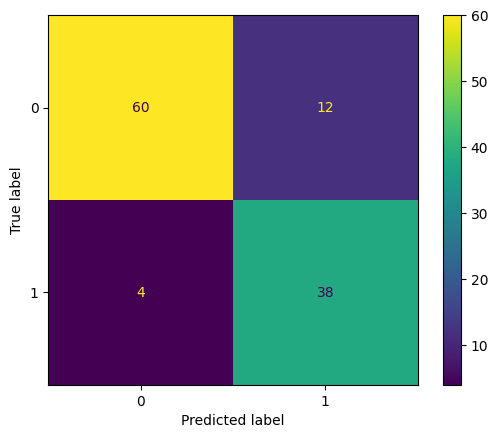

In [205]:
cm = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)